# Load modules

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
import re

In [2]:
df=pd.read_csv('/home/e077926/buscode_2023/05_E2_tata/data/bio_from_bbox_df.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,doc,line_id,value,entity
0,X00016469612,1,TAN,O
1,X00016469612,1,WOON,O
2,X00016469612,1,YANN,O
3,X00016469612,2,BOOK,company-B
4,X00016469612,2,TA,company-I


# Data analyse

Combien de date-i et de total-i? 

Pour quelles valeurs?

<Axes: xlabel='entity'>

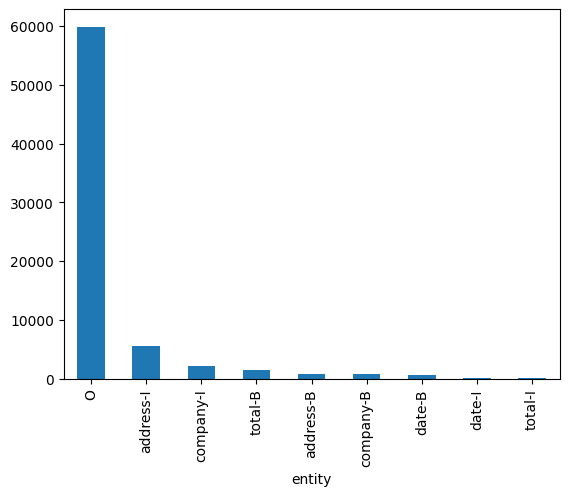

In [3]:
bio_repartition=df['entity']
bio_repartition.value_counts().plot(kind= 'bar')

In [4]:
bio_repartition_noo=df[df['entity'] != "O"].reset_index()

<Axes: xlabel='entity'>

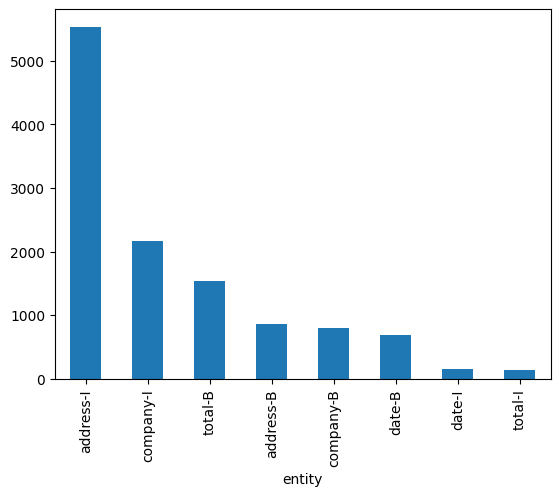

In [5]:
bio_repartition_noo=bio_repartition_noo['entity']
bio_repartition_noo.value_counts().plot(kind= 'bar')

In [6]:
bio_repartition.value_counts()

entity
O            59862
address-I     5532
company-I     2161
total-B       1531
address-B      858
company-B      795
date-B         687
date-I         155
total-I        139
Name: count, dtype: int64

In [7]:
df_train=pd.read_csv('/home/e077926/buscode_2023/05_E2_tata/data/training_from_bbox_df.csv')
df_train = df_train.drop(columns=['Unnamed: 0'])
df_train.head()

,sentence_id,tokens,labels,ner_tags
0,0,"['TAN', 'WOON', 'YANN']","['O', 'O', 'O']","[0, 0, 0]"
1,1,"['25/12/2018', '8:13:39', 'PM']","['B-date', 'O', 'O']","[5, 0, 0]"
2,2,['CASHIER:'],['O'],[0]
3,3,['MANIS'],['O'],[0]
4,4,['MEMBER:'],['O'],[0]


In [8]:
# Filtrer les lignes où 'date-I' est dans la liste de la colonne 'labels'
filtered_df_i_date = df_train[df_train['labels'].apply(lambda x: 'I-date' in x)]

In [9]:
df_train.iloc[1775:1810]

,sentence_id,tokens,labels,ner_tags
1775,1775,"['GST', 'SUMMARY']","['O', 'O']","[0, 0]"
1776,1776,['ITEM'],['O'],[0]
1777,1777,"['GST', '(MYR)']","['O', 'O']","[0, 0]"
1778,1778,"['SR', '@', '6%']","['O', 'O', 'O']","[0, 0, 0]"
1779,1779,['1'],['O'],[0]
1780,1780,"['KAWASAN', 'PERINDUSTRIAN', 'BUKIT', 'SERDANG,']","['B-address', 'I-address', 'I-address', 'I-add...","[3, 4, 4, 4]"
1781,1781,['20.00'],['O'],[0]
1782,1782,['1.20'],['O'],[0]
1783,1783,"['THANK', 'YOU.', 'PLEASE', 'COME', 'AGAIN', '!']","['O', 'O', 'O', 'O', 'O', 'O']","[0, 0, 0, 0, 0, 0]"
1784,1784,"['AMOUNT', '(MYR)']","['O', 'O']","[0, 0]"


In [10]:
filtered_df_i_total = df_train[df_train['labels'].apply(lambda x: 'I-total' in x)]
filtered_df_i_total

,sentence_id,tokens,labels,ner_tags
398,398,['20.00'],['I-total'],[7]
523,523,['26.60'],['I-total'],[7]
609,609,"['15.00', 'S']","['I-total', 'O']","[7, 0]"
663,663,['15.90'],['I-total'],[7]
890,890,['15.90'],['I-total'],[7]
...,...,...,...,...
30435,30435,['15.00'],['I-total'],[7]
31193,31193,['17.45'],['I-total'],[7]
31401,31401,"['48.00', 'SR']","['I-total', 'O']","[7, 0]"
32765,32765,['68.90'],['I-total'],[7]


## Comparer avec la matrice de confusion après training 

In [27]:
mix_o_df=df_train[df_train['labels'].apply(lambda x: 'O' in x)]

In [28]:
mix_o_df

,sentence_id,tokens,labels,ner_tags
0,0,"['TAN', 'WOON', 'YANN']","['O', 'O', 'O']","[0, 0, 0]"
1,1,"['25/12/2018', '8:13:39', 'PM']","['B-date', 'O', 'O']","[5, 0, 0]"
2,2,['CASHIER:'],['O'],[0]
3,3,['MANIS'],['O'],[0]
4,4,['MEMBER:'],['O'],[0]
...,...,...,...,...
33610,33610,['0.68'],['O'],[0]
33611,33611,"['THANK', 'YOU']","['O', 'O']","[0, 0]"
33612,33612,"['FOR', 'ANY', 'ENQUIRY,', 'PLEASE', 'CONTACT'...","['O', 'O', 'O', 'O', 'O', 'O']","[0, 0, 0, 0, 0, 0]"
33616,33616,"['GST', 'ID', ':', '002139201536']","['O', 'O', 'O', 'O']","[0, 0, 0, 0]"


# test_df analysis

In [31]:
test_df=pd.read_csv('/home/e077926/buscode_2023/05_E2_tata/data/test_df.csv')
test_df = test_df.drop(columns=['Unnamed: 0'])
test_df.head()

,sentence_id,tokens,labels,ner_tags
0,33250,['DESCRIPTION'],['O'],[0]
1,26613,['CASH'],['O'],[0]
2,30250,"['TAKE', 'AWAY']","['O', 'O']","[0, 0]"
3,27544,"['EXCHANGE', 'WITHIN', '1', 'WEEK', 'FROM', 'T...","['O', 'O', 'O', 'O', 'O', 'O']","[0, 0, 0, 0, 0, 0]"
4,24684,['3.20'],['O'],[0]


In [33]:
# Exemple de DataFrame
data = {
    "sentence_id": [33250, 26613, 30250, 27544, 24684],
    "tokens": [['DESCRIPTION'], ['CASH'], ['TAKE', 'AWAY'], ['EXCHANGE', 'WITHIN', '1', 'WEEK', 'FROM', 'T...'], ['3.20']],
    "labels": [['O'], ['O'], ['O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O'], ['O']],
    "ner_tags": [[0], [0], [0, 0], [0, 0, 0, 0, 0, 0], [0]]
}

df = pd.DataFrame(data)

# Compter le nombre total de chaque type de string dans les listes de labels
labels_count = df_train.explode('labels')['labels'].value_counts()

# Compter le nombre de listes qui contiennent uniquement des 'O'
only_o_counts = df_train['labels'].apply(lambda x: set(x) == {'O'}).sum()

# Compter le nombre de listes qui contiennent des 'O' en plus d'autres entités
mixed_o_counts = df_train['labels'].apply(lambda x: 'O' in x and len(set(x)) > 1).sum()

print(f"Compte des types de labels : \n{labels_count}")

Compte des types de labels : 
labels
['O']                                                                     15789
['O', 'O']                                                                 5532
['O', 'O', 'O']                                                            2943
['O', 'O', 'O', 'O']                                                       1781
['B-total']                                                                1294
                                                                          ...  
['B-address', 'I-address', 'I-address', 'O', 'B-address', 'I-address']        1
['B-company', 'I-company', 'O']                                               1
['O', 'O', 'O', 'B-date', 'O']                                                1
['B-company', 'O', 'B-company', 'I-company']                                  1
['O', 'B-company', 'I-company', 'I-company']                                  1
Name: count, Length: 216, dtype: int64
Nombre de listes avec uniquement 'O' : 0
Nom

In [47]:
# Préparation des listes pour stocker les données filtrées
import ast 
filtered_labels = []
filtered_counts = []

# Itérer sur chaque élément pour filtrer ceux qui contiennent uniquement 'O'
for label_str, count in labels_count.items():
    # Convertir la chaîne de caractères en liste
    label = ast.literal_eval(label_str)
    
    # Vérifier si tous les éléments de la liste sont 'O'
    if all(letters == 'O' for letters in label):
        filtered_labels.append(label_str)  # Utiliser label_str pour conserver le format original
        filtered_counts.append(count)

# Création d'un DataFrame avec les labels filtrés et leurs comptes
filtered_df = pd.DataFrame({
    "label": filtered_labels,
    "count": filtered_counts
})

print(filtered_df)


                                                label  count
0                                               ['O']  15789
1                                          ['O', 'O']   5532
2                                     ['O', 'O', 'O']   2943
3                                ['O', 'O', 'O', 'O']   1781
4                           ['O', 'O', 'O', 'O', 'O']   1269
5                      ['O', 'O', 'O', 'O', 'O', 'O']    585
6                 ['O', 'O', 'O', 'O', 'O', 'O', 'O']    359
7            ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']    160
8       ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']     19
9   ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...      7
10  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...      6
11  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...      3
12  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...      2
13  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...      1


In [55]:
# Compter le nombre total de chaque type de string dans les listes de labels
labels_count = df_train.explode('labels')['labels'].value_counts()

# Compter le nombre de listes qui contiennent uniquement des 'O'
only_o_counts = df_train['labels'].apply(lambda x: set(x) == {'O'}).sum()

# Compter le nombre de listes qui contiennent des 'O' en plus d'autres entités
mixed_o_counts = df_train['labels'].apply(lambda x: 'O' in x and len(set(x)) > 1).sum()

# Calculer le nombre total de 'O' dans toutes les listes
total_o_count = df_train.explode('labels')['labels'].apply(lambda x: x == 'O').sum()

print(f"Compte des types de labels : \n{labels_count}")
print(f"Nombre de listes avec uniquement 'O' : {only_o_counts}")
print(f"Nombre de listes avec 'O' plus d'autres entités : {mixed_o_counts}")
print(f"Nombre total de 'O' dans toutes les listes : {total_o_count}")


Compte des types de labels : 
labels
O        6
B-loc    1
B-per    1
I-per    1
B-org    1
I-org    1
Name: count, dtype: int64
Nombre de listes avec uniquement 'O' : 2
Nombre de listes avec 'O' plus d'autres entités : 2
Nombre total de 'O' dans toutes les listes : 6


In [57]:
# Compter le nombre total de chaque type de string dans les listes de labels
labels_count = test_df.explode('labels')['labels'].value_counts()

# Compter le nombre de listes qui contiennent uniquement des 'O'
only_o_counts = test_df['labels'].apply(lambda x: set(x) == {'O'}).sum()

# Compter le nombre de listes qui contiennent des 'O' en plus d'autres entités
mixed_o_counts = test_df['labels'].apply(lambda x: 'O' in x and len(set(x)) > 1).sum()

# Calculer le nombre total de 'O' dans toutes les listes
total_o_count = test_df.explode('labels')['labels'].apply(lambda x: x == 'O').sum()

print(f"Compte des types de labels : \n{labels_count}")
print(f"Nombre de listes avec uniquement 'O' : {only_o_counts}")
print(f"Nombre de listes avec 'O' plus d'autres entités : {mixed_o_counts}")
print(f"Nombre total de 'O' dans toutes les listes : {total_o_count}")


Compte des types de labels : 
labels
['O']                                                             2404
['O', 'O']                                                         863
['O', 'O', 'O']                                                    433
['O', 'O', 'O', 'O']                                               281
['O', 'O', 'O', 'O', 'O']                                          186
                                                                  ... 
['O', 'B-company', 'I-company', 'I-company']                         1
['B-company', 'I-company', 'O', 'O', 'O', 'O', 'B-company']          1
['I-address', 'I-address', 'I-address', 'I-address', 'O']            1
['B-company', 'I-company', 'I-company', 'I-company', 'O', 'O']       1
['B-company', 'I-company', 'O', 'O']                                 1
Name: count, Length: 114, dtype: int64
Nombre de listes avec uniquement 'O' : 0
Nombre de listes avec 'O' plus d'autres entités : 4549
Nombre total de 'O' dans toutes les listes : 0


In [59]:
# Filtrer pour obtenir les lignes où les listes contiennent des 'O' en plus d'autres entités
mixed_labels_df = test_df[test_df['labels'].apply(lambda x: 'O' in x and len(set(x)) > 1)]

# Afficher ces lignes
print(mixed_labels_df)



      sentence_id                                             tokens  \
0           33250                                    ['DESCRIPTION']   
1           26613                                           ['CASH']   
2           30250                                   ['TAKE', 'AWAY']   
3           27544  ['EXCHANGE', 'WITHIN', '1', 'WEEK', 'FROM', 'T...   
4           24684                                           ['3.20']   
...           ...                                                ...   
5038         5016                                    ['TAX', '(RM)']   
5039        21581                                     ['AMOUNT(RM)']   
5040        27309                       ['PLEASE', 'COME', 'AGAIN.']   
5041         8075                                          ['TOTAL']   
5042         2568                       ['CASHIER', ':', 'CASHTER2']   

                              labels            ner_tags  
0                              ['O']                 [0]  
1                

In [66]:
# Aplatir la liste des labels pour travailler avec les entités individuelles
flattened_labels = [label for sublist in test_df['labels'].tolist() for label in sublist]
flattened_labels
# # Convertir la liste aplatie en une série pandas pour utiliser value_counts()
# flattened_series = pd.Series(flattened_labels)

# # Compter le nombre de chaque entité individuelle
# entities_count = flattened_series.value_counts()

# # Afficher le compte de chaque entité
# print(entities_count)


['[',
 "'",
 'O',
 "'",
 ']',
 '[',
 "'",
 'O',
 "'",
 ']',
 '[',
 "'",
 'O',
 "'",
 ',',
 ' ',
 "'",
 'O',
 "'",
 ']',
 '[',
 "'",
 'O',
 "'",
 ',',
 ' ',
 "'",
 'O',
 "'",
 ',',
 ' ',
 "'",
 'O',
 "'",
 ',',
 ' ',
 "'",
 'O',
 "'",
 ',',
 ' ',
 "'",
 'O',
 "'",
 ',',
 ' ',
 "'",
 'O',
 "'",
 ']',
 '[',
 "'",
 'O',
 "'",
 ']',
 '[',
 "'",
 'O',
 "'",
 ',',
 ' ',
 "'",
 'O',
 "'",
 ',',
 ' ',
 "'",
 'O',
 "'",
 ',',
 ' ',
 "'",
 'O',
 "'",
 ',',
 ' ',
 "'",
 'O',
 "'",
 ']',
 '[',
 "'",
 'O',
 "'",
 ',',
 ' ',
 "'",
 'O',
 "'",
 ',',
 ' ',
 "'",
 'O',
 "'",
 ',',
 ' ',
 "'",
 'O',
 "'",
 ',',
 ' ',
 "'",
 'O',
 "'",
 ']',
 '[',
 "'",
 'O',
 "'",
 ']',
 '[',
 "'",
 'O',
 "'",
 ',',
 ' ',
 "'",
 'O',
 "'",
 ',',
 ' ',
 "'",
 'O',
 "'",
 ']',
 '[',
 "'",
 'O',
 "'",
 ',',
 ' ',
 "'",
 'O',
 "'",
 ']',
 '[',
 "'",
 'O',
 "'",
 ',',
 ' ',
 "'",
 'O',
 "'",
 ']',
 '[',
 "'",
 'O',
 "'",
 ']',
 '[',
 "'",
 'B',
 '-',
 'a',
 'd',
 'd',
 'r',
 'e',
 's',
 's',
 "'",
 ',',
 ' ',
 "'",
 'I',
 '-'

In [65]:
label_count_df=test_df['labels'].explode()

KeyError: "None of [Index(['['O']', '['O']', '['O', 'O']', '['O', 'O', 'O', 'O', 'O', 'O']',\n       '['O']', '['O', 'O', 'O', 'O', 'O']', '['O', 'O', 'O', 'O', 'O']',\n       '['O']', '['O', 'O', 'O']', '['O', 'O']',\n       ...\n       '['O']', '['B-total']', '['O', 'O']', '['O']', '['O']', '['O', 'O']',\n       '['O']', '['O', 'O', 'O']', '['O']', '['O', 'O', 'O']'],\n      dtype='object', length=5043)] are in the [columns]"

In [64]:
label_count_df

0                                ['O']
1                                ['O']
2                           ['O', 'O']
3       ['O', 'O', 'O', 'O', 'O', 'O']
4                                ['O']
                     ...              
5038                        ['O', 'O']
5039                             ['O']
5040                   ['O', 'O', 'O']
5041                             ['O']
5042                   ['O', 'O', 'O']
Name: labels, Length: 5043, dtype: object